In [63]:
import numpy as np
from astropy.io import fits
from craco.cardcap import CardcapFile

from pylab import *
%matplotlib notebook

In [64]:

def load(fname, dtype, count=4000*2*100):
    hdr  = fits.getheader(fname)
    hdr_nbytes = len(str(hdr))    
    hdr_nbytes = 3*2880
    with open(fname) as f:
        f = open(fname)       
        print(hdr_nbytes)
        f.seek(hdr_nbytes)
        print(hdr)
        packets = np.fromfile(f, dtype=dtype, count=count)
        return packets
    

In [38]:
from craco.cardcap import get_single_packet_dtype

# drx noise is only present in 
nant = 30
i = 0
products = []
prodids = {}
for a1 in range(nant):
    for a2 in range(a1, nant):
        print(f'{i} = {a1+1}-{a2+1}')
        i += 1
        products.append((a1+1, a2+1))
        prodids[(a1+1,a2+1)] = i
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])

0 = 1-1
1 = 1-2
2 = 1-3
3 = 1-4
4 = 1-5
5 = 1-6
6 = 1-7
7 = 1-8
8 = 1-9
9 = 1-10
10 = 1-11
11 = 1-12
12 = 1-13
13 = 1-14
14 = 1-15
15 = 1-16
16 = 1-17
17 = 1-18
18 = 1-19
19 = 1-20
20 = 1-21
21 = 1-22
22 = 1-23
23 = 1-24
24 = 1-25
25 = 1-26
26 = 1-27
27 = 1-28
28 = 1-29
29 = 1-30
30 = 2-2
31 = 2-3
32 = 2-4
33 = 2-5
34 = 2-6
35 = 2-7
36 = 2-8
37 = 2-9
38 = 2-10
39 = 2-11
40 = 2-12
41 = 2-13
42 = 2-14
43 = 2-15
44 = 2-16
45 = 2-17
46 = 2-18
47 = 2-19
48 = 2-20
49 = 2-21
50 = 2-22
51 = 2-23
52 = 2-24
53 = 2-25
54 = 2-26
55 = 2-27
56 = 2-28
57 = 2-29
58 = 2-30
59 = 3-3
60 = 3-4
61 = 3-5
62 = 3-6
63 = 3-7
64 = 3-8
65 = 3-9
66 = 3-10
67 = 3-11
68 = 3-12
69 = 3-13
70 = 3-14
71 = 3-15
72 = 3-16
73 = 3-17
74 = 3-18
75 = 3-19
76 = 3-20
77 = 3-21
78 = 3-22
79 = 3-23
80 = 3-24
81 = 3-25
82 = 3-26
83 = 3-27
84 = 3-28
85 = 3-29
86 = 3-30
87 = 4-4
88 = 4-5
89 = 4-6
90 = 4-7
91 = 4-8
92 = 4-9
93 = 4-10
94 = 4-11
95 = 4-12
96 = 4-13
97 = 4-14
98 = 4-15
99 = 4-16
100 = 4-17
101 = 4-18
102 = 4-19
103 = 4

In [39]:
!ls -lrth *drxnoise*.fits

-rw-rw-r-- 1 ban115 ban115 360M May 13 14:13 mates-debughdr-drxnoise-dualpol.fits
-rw-rw-r-- 1 ban115 ban115 363M May 13 14:22 mates-debughdr-drxnoise-pol-sum.fits
-rw-rw-r-- 1 ban115 ban115 660M May 13 14:23 mates-debughdr-drxnoise-dual-pol.fits
-rw-rw-r-- 1 ban115 ban115 990M May 13 14:27 mates-debughdr-drxnoise-dual-pol-lsb18.fits
-rw-rw-r-- 1 ban115 ban115 858M May 13 14:32 mates-debughdr-drxnoise-dual-pol-lsb16.fits
-rw-rw-r-- 1 ban115 ban115 462M May 13 14:33 mates-debughdr-drxnoise-dual-pol-lsb15.fits
-rw-rw-r-- 1 ban115 ban115 792M May 13 14:33 mates-debughdr-drxnoise-dual-pol-lsb14.fits
-rw-rw-r-- 1 ban115 ban115 594M May 13 16:29 mates-debughdr-drxnoise-dual-pol-lsb0.fits
-rw-rw-r-- 1 ban115 ban115 660M May 13 16:29 mates-debughdr-drxnoise-dual-pol-lsb11.fits


In [40]:
packets_dp = load('mates-debughdr-drxnoise-dual-pol-lsb11.fits', get_single_packet_dtype(30*31//2, True, sum_pols=False))
packets_ps = load('mates-debughdr-drxnoise-pol-sum.fits', get_single_packet_dtype(30*31//2, True, sum_pols=True))



8640
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

<IPython.core.display.Javascript object>


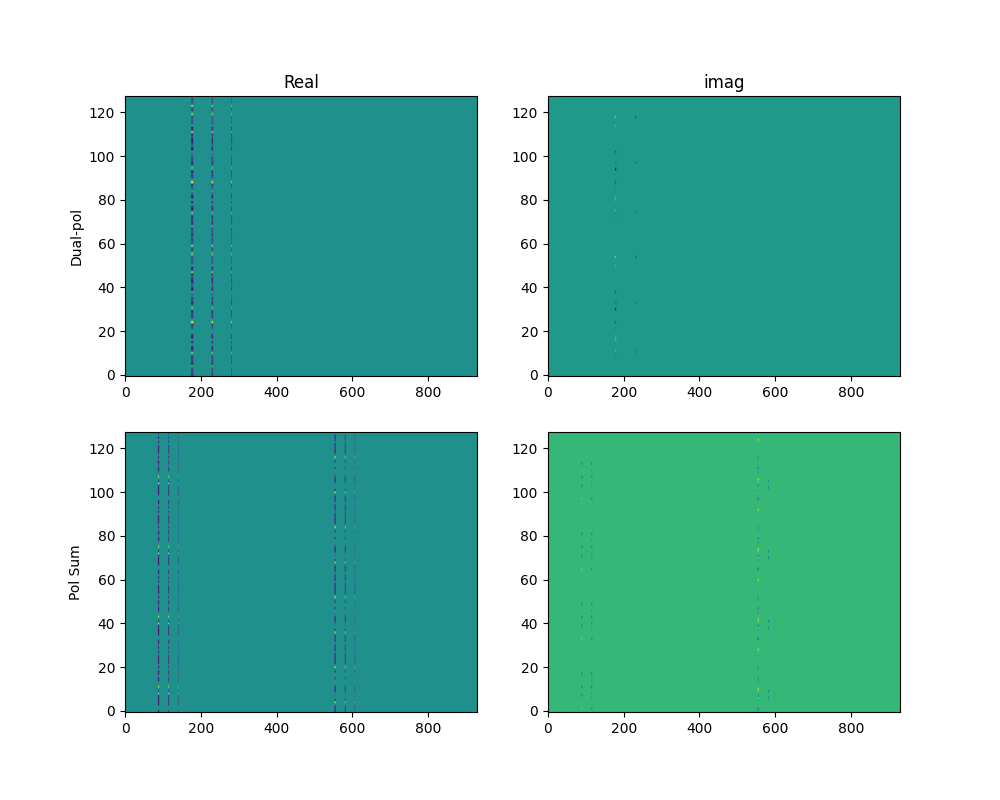

(128, 930, 2) (128, 930, 2)


In [41]:
fig, ax = subplots(2,2)
ax = ax.flatten()

N = 128
ddp = packets_dp['data'][:N,:,:,:].reshape(N,-1,2)
dps = packets_ps['data'][:N,:,:,:].reshape(N,-1,2)
print(ddp.shape, dps.shape)

ax[0].imshow(ddp[:,:,0], aspect='auto', origin='lower')
ax[1].imshow(ddp[:,:,1], aspect='auto', origin='lower')
ax[2].imshow(dps[:,:,0], aspect='auto', origin='lower')
ax[3].imshow(dps[:,:,1], aspect='auto', origin='lower')
ax[0].set_title('Real')
ax[1].set_title('imag')
ax[0].set_ylabel('Dual-pol')
ax[2].set_ylabel('Pol Sum')
fig.set_size_inches([10,8])

In [42]:
def pstats(ax, v):
    line1, = ax.plot(v.mean(axis=0))
    line2, = ax.plot(v.std(axis=0))
    line3, = ax.plot(v.max(axis=0))
    line4, = ax.plot(v.min(axis=0))
    
    return (line1, line2, line3, line4)


def figstats(ddp):
    fig, ax = subplots(1,2, sharex=True)
    ax = ax.flatten()
    pstats(ax[0], ddp[:,:,0])
    lines = pstats(ax[1], ddp[:,:,1])
    ax[0].set_title('Real')
    ax[1].set_title('imag')
    ax[0].set_ylabel('Dual-pol')
    ax[1].set_ylabel('Pol Sum')
    fig.set_size_inches([8,4])
    fig.legend(lines, ['mean','std','max','min'])
    

<IPython.core.display.Javascript object>


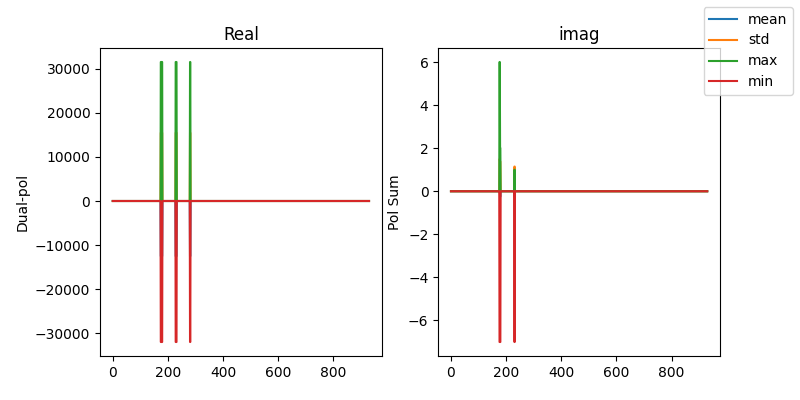

In [43]:
figstats(ddp)

In [44]:
print(products[174//2:174//2+3])
print(products[228//2:228//2+2])
print(products[280//2:280//2+1])

[(4, 4) (4, 5) (4, 6)]
[(5, 5) (5, 6)]
[(6, 6)]


<IPython.core.display.Javascript object>


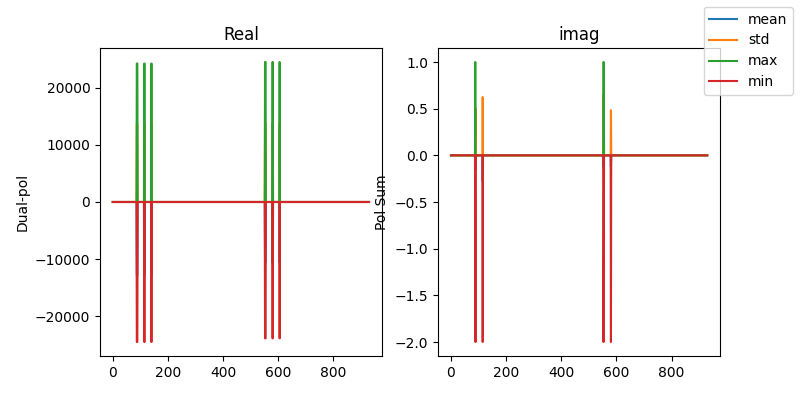

In [45]:
figstats(dps)

In [46]:
print(products[87:87+3])
print(products[114:114+2])
print(products[140:140+1])

[(4, 4) (4, 5) (4, 6)]
[(5, 5) (5, 6)]
[(6, 6)]


In [47]:
products[86]

(3, 30)

In [59]:
idxs = np.where(ddp[:,::2,0].max(axis=0) > 1000)[0]
idxs

array([ 87,  88,  89, 114, 115, 140])

In [60]:
products[idxs]

array([(4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)],
      dtype=[('a1', '<i2'), ('a2', '<i2')])

In [61]:
ddp.shape

(128, 930, 2)

<IPython.core.display.Javascript object>


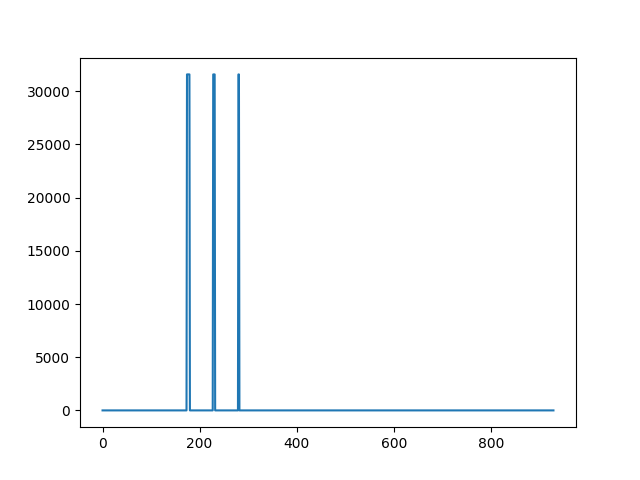

In [62]:
figure()
plot(ddp[:,:,0].max(axis=0))

# Data with DRX noise on ak 4,5 but off for  ak06

In this case John sees data on lanes 1 and lane 4 (0 based) at the .... simulator chipscope

In [65]:
!ls data/testdata-drxnoise/*.fits

data/testdata-drxnoise/test-debughdr-lsb11-ant45on.fits


In [67]:
ccap = CardcapFile('data/testdata-drxnoise/test-debughdr-lsb11-ant45on.fits')

In [70]:
d = ccap.load_packets()[1:]

In [72]:
d['data'].shape

(92159, 1, 465, 2, 2)

In [73]:
ddata = d['data']

<IPython.core.display.Javascript object>


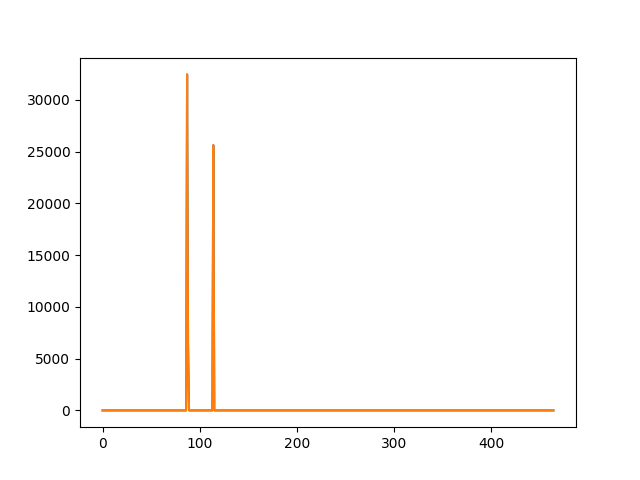

In [77]:
figure()
plot(ddata[:100,0,:,0,0].max(axis=0))
plot(ddata[:100,0,:,1,0].max(axis=0))

In [78]:
products[87]

(4, 4)

In [79]:
products[114]

(5, 5)

In [90]:
idxs = np.where(ddata[:100,0,:,0,0].max(axis=0) > 1)[0]
idxs

array([ 87,  88, 114])

In [91]:
products[idxs]

array([(4, 4), (4, 5), (5, 5)], dtype=[('a1', '<i2'), ('a2', '<i2')])

In [94]:
idxs = np.where(ddata[:100,0,:,0,1].max(axis=0) > 1)[0]
idxs

array([88])

In [95]:
products[idxs]

array([(4, 5)], dtype=[('a1', '<i2'), ('a2', '<i2')])

In [86]:
assert np.all(ddata[:,0,prodids[(4,4)],:,1] == 0)

AssertionError: 

In [100]:
np.arange(1,37).reshape(6,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]])